# Travelling Salesman Problem using Genetic Algorithm

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
from itertools import permutations
import random
import numpy as np
import seaborn as sns

## Data

### Cities Coordinates and Algorithm Parameters

In [2]:
x = [0,3,6,7,15,10,16,5,8,1.5]
y = [1,2,1,4.5,-1,2.5,11,6,9,12]
cities_names = ["Gliwice", "Cairo", "Rome", "Krakow", "Paris", "Alexandria", "Berlin", "Tokyo", "Rio", "Budapest"]
city_coords = dict(zip(cities_names, zip(x, y)))
n_population = 250
crossover_per = 0.8
mutation_per = 0.2
n_generations = 200

## Visualising Cities

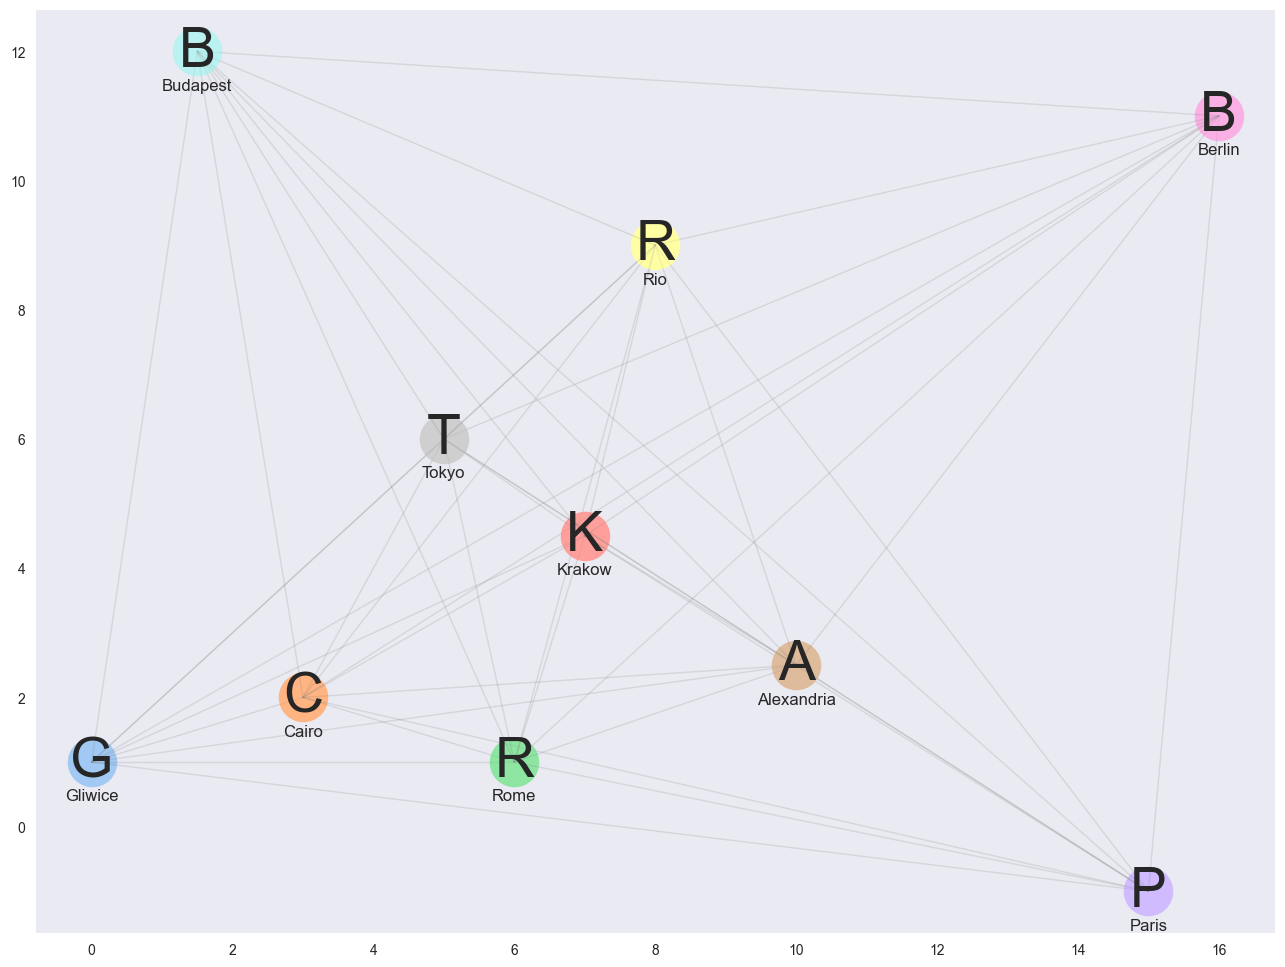

In [3]:
colors = sns.color_palette("pastel", len(cities_names))

city_icons = {
    "Gliwice": "G",
    "Cairo": "C",
    "Rome": "R",
    "Krakow": "K",
    "Paris": "P",
    "Alexandria": "A",
    "Berlin": "B",
    "Tokyo": "T",
    "Rio": "R",
    "Budapest": "B"
}

fig, ax = plt.subplots()
fig.set_size_inches(16, 12)


ax.grid(False)  

for i, (city, (city_x, city_y)) in enumerate(city_coords.items()):
    color = colors[i]
    icon = city_icons[city]
    ax.scatter(city_x, city_y, c=[color], s=1200, zorder=2)
    ax.annotate(icon, (city_x, city_y), fontsize=40, ha='center', va='center', zorder=3)
    ax.annotate(city, (city_x, city_y), fontsize=12, ha='center', va='bottom', xytext=(0, -30),
                textcoords='offset points')

    for j, (other_city, (other_x, other_y)) in enumerate(city_coords.items()):
        if i != j:
            ax.plot([city_x, other_x], [city_y, other_y], color='gray', linestyle='-', linewidth=1, alpha=0.1)

plt.show()

## Population Function (Random Initialization)

In [4]:
def initial_population(cities_list, n_population = 250):
    population_perms = []
    possible_perms = list(permutations(cities_list))
    random_ids = random.sample(range(0,len(possible_perms)),n_population)
    
    for i in random_ids:
        population_perms.append(list(possible_perms[i]))
        
    return population_perms

## Distance between two cities

In [5]:
def dist_two_cities(city_1, city_2):
    city_1_coords = city_coords[city_1]
    city_2_coords = city_coords[city_2]
    return np.sqrt(np.sum((np.array(city_1_coords) - np.array(city_2_coords))**2))

## Total distance traveled by individual 

In [6]:
def total_dist_individual(individual):
    total_dist = 0
    for i in range(0, len(individual)):
        if(i == len(individual) - 1):
            total_dist += dist_two_cities(individual[i], individual[0])
        else:
            total_dist += dist_two_cities(individual[i], individual[i+1])
    return total_dist

## Fitness probability function

In [7]:
def fitness_prob(population):
    total_dist_all_individuals = []
    for i in range(0, len(population)):
        total_dist_all_individuals.append(total_dist_individual(population[i]))
        
    max_population_cost = max(total_dist_all_individuals)
    population_fitness = max_population_cost - total_dist_all_individuals
    population_fitness_sum = sum(population_fitness)
    population_fitness_probs = population_fitness / population_fitness_sum
    return population_fitness_probs

## Roulette wheel

In [8]:
def roulette_wheel(population, fitness_probs):
    population_fitness_probs_cumsum = fitness_probs.cumsum()
    bool_prob_array = population_fitness_probs_cumsum < np.random.uniform(0,1,1)
    selected_individual_index = len(bool_prob_array[bool_prob_array == True]) - 1
    return population[selected_individual_index]

## Crossover

In [9]:
def crossover(parent_1, parent_2):
    n_cities_cut = len(cities_names) - 1
    cut = round(random.uniform(1, n_cities_cut))
    
    offspring_1 = parent_1[0:cut]
    offspring_1 += [city for city in parent_2 if city not in offspring_1]
    
    offspring_2 = parent_2[0:cut]
    offspring_2 += [city for city in parent_1 if city not in offspring_2]
    
    return offspring_1, offspring_2  

## Mutation

In [10]:
def mutation(offspring):
    n_cities_cut = len(cities_names) - 1
    index_1 = round(random.uniform(0,n_cities_cut))
    index_2 = round(random.uniform(0,n_cities_cut))

    temp = offspring[index_1]
    offspring[index_1] = offspring[index_2]
    offspring[index_2] = temp
    return offspring

## Algorithm

1. Implement the described GA algorithm to solve the traveling salesman problem.
Use a map of cities provided e.g. N = 10 and the GA parameters:
P = 250, n = 0.8, p m = 0.2, T max = 1000. What was the minimal total distance
traveled? What is the sequence of cities to be visited ensuring the minimal
total distance traveled?
2. Investigation the influence of parameters P, n and p m on the mean minimal total
distance traveled calculated for 10 trials. Change the values of P within a set
{100, 300, 500}, n ∈ {0.5, 0.7, 0.9} and p m ∈ {0.1, 0.3, 0.5}.

In [11]:
def run_ga(cities_names, n_population, n_generations, crossover_per, mutation_per):
    
    population = initial_population(cities_names, n_population)
    fitness_probs = fitness_prob(population)
    
    parents_list = []
    for i in range(0, int(crossover_per * n_population)):
        parents_list.append(roulette_wheel(population, fitness_probs))

    offspring_list = []    
    for i in range(0,len(parents_list), 2):
        offspring_1, offspring_2 = crossover(parents_list[i], parents_list[i+1])
        mutate_threashold = random.random()
        if mutate_threashold > (1 - mutation_per):
            offspring_1 = mutation(offspring_1)
        mutate_threashold = random.random()
        if mutate_threashold > (1 - mutation_per):
            offspring_2 = mutation(offspring_2)

        offspring_list.append(offspring_1)
        offspring_list.append(offspring_2)

    mixed_offspring = parents_list + offspring_list

    fitness_probs = fitness_prob(mixed_offspring)
    sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
    best_fitness_indices = sorted_fitness_indices[0:n_population]
    best_mixed_offsrping = []
    for i in best_fitness_indices:
        best_mixed_offsrping.append(mixed_offspring[i])
        


    for i in range(0, n_generations):    
        fitness_probs = fitness_prob(best_mixed_offsrping)
        parents_list = []
        for i in range(0, int(crossover_per * n_population)):
            parents_list.append(roulette_wheel(best_mixed_offsrping, fitness_probs))

        offspring_list = []    
        for i in range(0,len(parents_list), 2):
            offspring_1, offspring_2 = crossover(parents_list[i], parents_list[i+1])

            mutate_threashold = random.random()
            if mutate_threashold > (1 - mutation_per):
                offspring_1 = mutation(offspring_1)

            mutate_threashold = random.random()
            if mutate_threashold > (1 - mutation_per):
                offspring_2 = mutation(offspring_2)

            offspring_list.append(offspring_1)
            offspring_list.append(offspring_2)


        mixed_offspring = parents_list + offspring_list
        fitness_probs = fitness_prob(mixed_offspring)
        sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
        best_fitness_indices = sorted_fitness_indices[0:int(0.8*n_population)]

        best_mixed_offsrping = []
        for i in best_fitness_indices:
            best_mixed_offsrping.append(mixed_offspring[i])
            
        old_population_indices = [random.randint(0, (n_population - 1)) for j in range(int(0.2*n_population))]
        for i in old_population_indices:
            best_mixed_offsrping.append(population[i])
            
        random.shuffle(best_mixed_offsrping)
            
    return best_mixed_offsrping

In [12]:
best_mixed_offsrping = run_ga(cities_names, n_population, n_generations, crossover_per, mutation_per)

In [13]:
total_dist_all_individuals = []
for i in range(0, n_population):
    total_dist_all_individuals.append(total_dist_individual(best_mixed_offsrping[i]))

In [14]:
index_minimum = np.argmin(total_dist_all_individuals)

### Optimum Solution

In [15]:
minimum_distance = min(total_dist_all_individuals)

In [16]:
minimum_distance

61.13744551656403

#### Optimum Solution is the distance of 61.137

In [17]:
shortest_path = best_mixed_offsrping[index_minimum]

In [18]:
shortest_path

['Gliwice',
 'Cairo',
 'Rome',
 'Krakow',
 'Alexandria',
 'Paris',
 'Berlin',
 'Rio',
 'Budapest',
 'Tokyo']

### Optimum Solution Visualization

In [19]:
x_shortest = []
y_shortest = []
for city in shortest_path:
    x_value, y_value = city_coords[city]
    x_shortest.append(x_value)
    y_shortest.append(y_value)
    
x_shortest.append(x_shortest[0])
y_shortest.append(y_shortest[0])

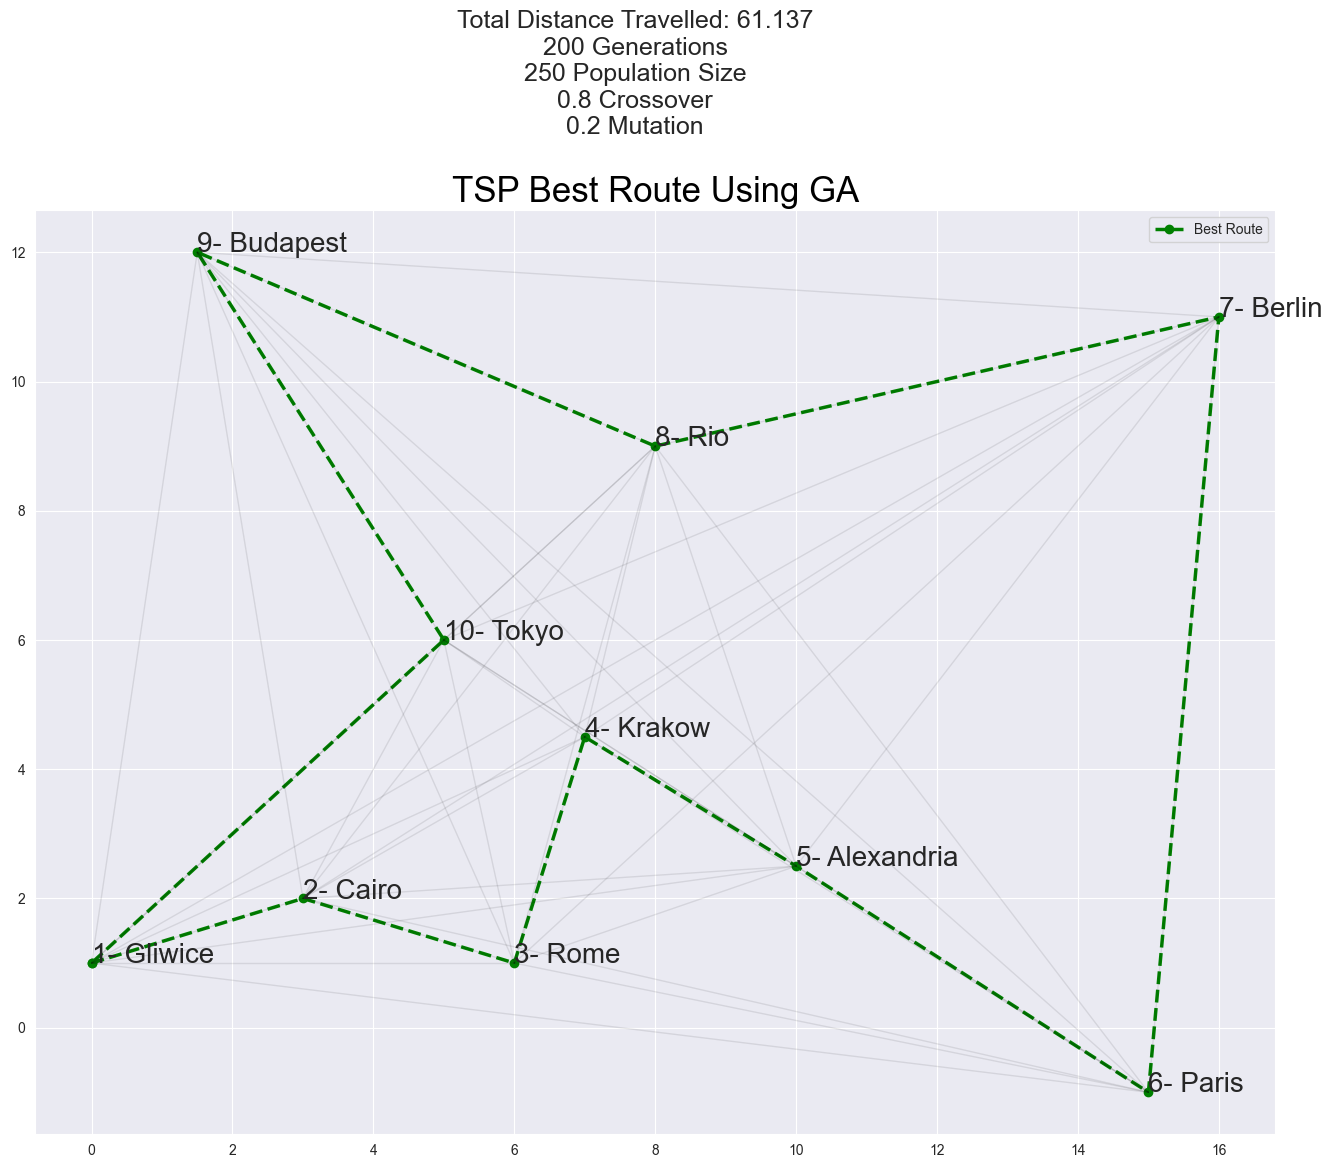

In [21]:
fig, ax = plt.subplots()
ax.plot(x_shortest, y_shortest, '--go', label='Best Route', linewidth=2.5)
plt.legend()

for i in range(len(x)):
    for j in range(i + 1, len(x)):
        ax.plot([x[i], x[j]], [y[i], y[j]], 'k-', alpha=0.09, linewidth=1)
        
plt.title(label="TSP Best Route Using GA",
          fontsize=25,
          color="k")

str_params = '\n'+str(n_generations)+' Generations\n'+str(n_population)+' Population Size\n'+str(crossover_per)+' Crossover\n'+str(mutation_per)+' Mutation'
plt.suptitle("Total Distance Travelled: "+ 
             str(round(minimum_distance, 3)) + 
             str_params, fontsize=18, y = 1.047)

for i, txt in enumerate(shortest_path):
    ax.annotate(str(i+1)+ "- " + txt, (x_shortest[i], y_shortest[i]), fontsize= 20)

fig.set_size_inches(16, 12)    
plt.savefig('solution.png')
plt.show()